# CS 109A/AC 209A/STAT 121A Data Science: Homework 3
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 28th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW3.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Tarazi, Ramez]

### Part (b): Course Number

[CS 109a]

### Part (c): Who did you work with?

[First and Land names of students with whom you have collaborated]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Multiple linear regression

### Part (a): Implement multiple linear regression from scratch

You are provided a data set containing attributes related to automobiles as well as their corresponding prices. The task is to build a linear regression model from scratch that can estimate the price of an automobile (response variable) using its attributes (predictor variables).

The file ``dataset_1_train.txt`` contains the training set that you can use to fit a regression model, and the file ``dataset_1_test.txt`` contains the test set that you can use to evaluate the model. In each file, the first two columns contain the predictors of the automobile, namely ``'horsepower'`` and ``'highway MPG'``, and the last column contains the automobile prices.

- Implement the following two functions from scratch. 

    - ``multiple_linear_regression_fit``:

        - takes as input: the training set, ``x_train``, ``y_train``

        - fits a multiple linear regression model

        - returns the model parameters (coefficients on the predictors, as an array, and the intercept, as a float).

    - ``multiple_linear_regression_score``:

        - takes model parameters (coefficients and intercept) and the test set, ``x_test`` ``y_test``, as inputs

        - returns the R^2 score for the model on the test set, along with the predicted y-values.
        
- Use your functions to predict automobile prices and evaluate your predictions.

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

In [2]:
### Functions for fitting and evaluating multiple linear regression

#--------  multiple_linear_regression_fit
# A function for fitting a multiple linear regression
# Fitted model: f(x) = x.w + c
# Input: 
#      x_train (n x d array of predictors in training data)
#      y_train (n x 1 array of response variable vals in training data)
# Return: 
#      w (d x 1 array of coefficients) 
#      c (float representing intercept)

def multiple_linear_regression_fit(x_train, y_train):
    
    # Append a column of one's to x
    n = x_train.shape[0]
    ones_col = np.ones((n, 1))
    x_train = np.concatenate((x_train, ones_col), axis=1)
    
    # Compute transpose of x
    x_transpose = np.transpose(x_train)
    
    # Compute coefficients: w = inv(x^T * x) x^T * y
    # Compute intermediate term: inv(x^T * x)
    # Note: We have to take pseudo-inverse (pinv), just in case x^T * x is not invertible 
    x_t_x_inv = np.linalg.pinv(np.dot(x_transpose, x_train))
    
    # Compute w: inter_term * x^T * y 
    w = np.dot(np.dot(x_t_x_inv, x_transpose), y_train)
    
    # Obtain intercept: 'c' (last index)
    c = w[-1]
    
    return w[:-1], c

#--------  multiple_linear_regression_score
# A function for evaluating R^2 score and MSE 
# of the linear regression model on a data set
# Input: 
#      w (d x 1 array of coefficients)
#      c (float representing intercept)
#      x_test (n x d array of predictors in testing data)
#      y_test (n x 1 array of response variable vals in testing data)
# Return: 
#      r_squared (float) 
#      y_pred (n x 1 array of predicted y-vals)

def multiple_linear_regression_score(w, c, x_test, y_test):        
    # Compute predicted labels
    y_pred = np.dot(x_test, w) + c
    
    # Evaluate sqaured error, against target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = np.sum(np.square(y_test - y_pred))
    
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean)^2
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_squared = 1 - sq_error / y_variance

    return r_squared, y_pred

In [3]:
# Load train and test data sets
data_train = np.loadtxt('datasets/dataset_1_train.txt', delimiter=',', skiprows=1)
data_test = np.loadtxt('datasets/dataset_1_test.txt', delimiter=',', skiprows=1)

# Split predictors from response
# Training
y_train = data_train[:, -1]
x_train = data_train[:, :-1]

# Testing
y_test = data_test[:, -1]
x_test = data_test[:, :-1]

# Fit multiple linear regression model
w, c = multiple_linear_regression_fit(x_train, y_train)

# Evaluate model
r_squared, _ = multiple_linear_regression_score(w, c, x_test, y_test)

print 'R^2 score on test set:', r_squared

R^2 score on test set: 0.177944627327


In [4]:
print 'price estimate of a 100 hp and 30 MPG car'
print w[0]*100 +w[1]*30 + c
#100 horsepower with 30 MPG estimate

price estimate of a 100 hp and 30 MPG car
14463.3577092


In [5]:
print 'price estimate of a 200 hp and 20 MPG car'
print w[0]*200 +w[1]*20 + c
#200 horsepower with 20 MPG estimate

price estimate of a 200 hp and 20 MPG car
22963.1100933


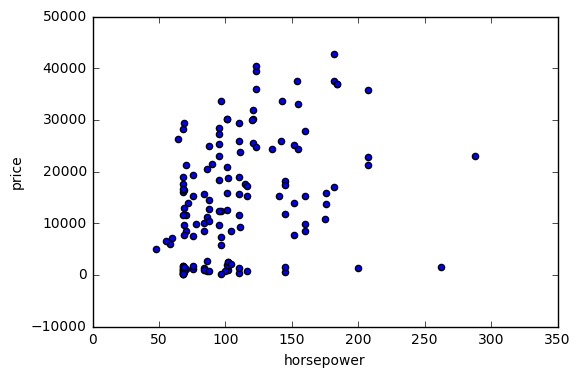

In [27]:
plt.scatter(data_train[:,0], data_train[:,2])
plt.xlabel("horsepower")
plt.ylabel("price")

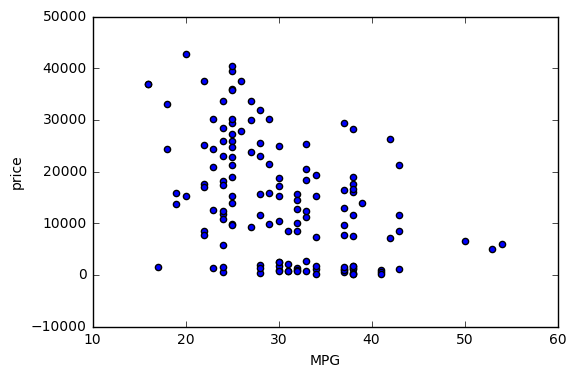

In [17]:
plt.scatter(data_train[:,1], data_train[:,2])
plt.xlabel("MPG")
plt.ylabel("price")

Linear Regression performed badly as the data that we attempted to model was not linear. R2 coefficient suggested that the model failed. The large non linear patterns seen in the scatter plots above, suggest that another method such as multiple variable polynomial regression would be more predictive.

### Part (b): Confidence interval on regression parameters
Using your linear regression implementation from Part (a), model the data in ``dataset_2.txt``, which contains five predictor variables in the first five columns, and the response variable in the last column.

Compute confidence intervals for the model parameters you obtain:

- Create 200 random subsamples of the data set of size 100, and use your function to fit a multiple linear regression model to each subsample. 

- For each coefficient on the predictor variables: plot a histogram of the values obtained across the subsamples, and calculate the confidence interval for the coefficients at a confidence level of 95%. 

- Highlight the mean coeffcient values and the end points of the confidence intervals using vertical lines on the histogram plot. How large is the spread of the coefficient values in the histograms, and how tight are the confidence intervals?

- Use the formula for computing confidence intervals provided in class (or use ``statmodels``) to compute the the confidence intervals. Compare confidence intervals you find through simulation to the ones given by the formula (or ``statmodels``), are your results what you would expect?

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

Linear regression with all predictors


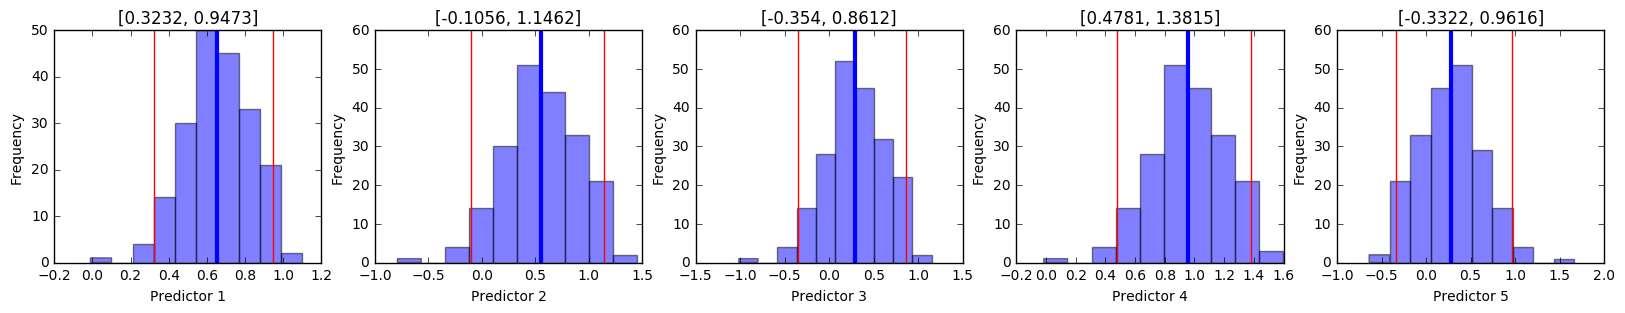

In [29]:
# Load train set
data = np.loadtxt("datasets/dataset_2.txt", delimiter=',', skiprows = 1)

# Size of data set, and subsample (10%)
x = data[:, :-1]
y = data[:, -1]

# Record size of the data set
n = x.shape[0]
d = x.shape[1]
subsample_size = 100

# No. of subsamples
num_samples = 200
    
### Linear regression with all 5 predictors

# Create a n x d array to store coefficients for 100 subsamples
coefs_multiple = np.zeros((num_samples, d))

print 'Linear regression with all predictors'

# Repeat for 200 subsamples
for i in range(num_samples):
    # Generate a random subsample of 50 data points
    perm = np.random.permutation(n) # Generate a list of indices 0 to n and permute it
    x_subsample = x[perm[:subsample_size], :] # Get x-vals for the first 50 indices in permuted list
    
    y_subsample = y[perm[:subsample_size]] # Get y-vals for the first 50 indices in permuted list

    # Fit linear regression model on subsample
    w, c = multiple_linear_regression_fit(x_subsample, y_subsample)
    # Store the coefficient for the model we obtain
    coefs_multiple[i, :] = w

# Plot histogram of coefficients, and report their confidence intervals 
fig, axes = plt.subplots(1, d, figsize=(20, 3))

# Repeat for each coefficient
for j in range(d):
    # Compute mean for the j-th coefficent from subsamples
    coef_j_mean = np.mean(coefs_multiple[:, j])
    
    # Compute confidence interval at 95% confidence level (use formula!)
    conf_int_left = np.percentile(coefs_multiple[:, j], 2.5)
    conf_int_right = np.percentile(coefs_multiple[:, j], 97.5)
       
    # Plot histogram of coefficient values
    axes[j].hist(coefs_multiple[:, j], alpha=0.5)

    # Plot vertical lines at mean and left, right extremes of confidence interval
    axes[j].axvline(x = coef_j_mean, linewidth=3)
    axes[j].axvline(x = conf_int_left, linewidth=1, c='r')
    axes[j].axvline(x = conf_int_right, linewidth=1, c='r')
    
    # Set plot labels
    axes[j].set_title('[' + str(round(conf_int_left, 4)) 
                      + ', ' 
                      + str(round(conf_int_right, 4)) + ']')
    axes[j].set_xlabel('Predictor ' + str(j + 1))
    axes[j].set_ylabel('Frequency')

plt.show()

In [30]:
import statsmodels.api as sm
# Add column of ones to x matrix
x = sm.add_constant(x)

# Create model for linear regression
model = sm.OLS(y, x)
# Fit model
fitted_model = model.fit()
# The confidence intervals for our five coefficients are contained in the last five
# rows of the fitted_model.conf_int() array
print fitted_model.summary()
conf_int = fitted_model.conf_int()[1:, :]

for j in range(d):
    print 'the confidence interval for the', j, 'th coefficient: [', conf_int[j][0], ',', conf_int[j][1], ']'

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.222e+05
Date:                Tue, 27 Sep 2016   Prob (F-statistic):               0.00
Time:                        23:09:57   Log-Likelihood:                 3237.2
No. Observations:                1000   AIC:                            -6462.
Df Residuals:                     994   BIC:                            -6433.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.4998      0.001   2062.637      0.0

The confidence interval suggests that the range of values contain the true value for the parameter that is being explored with a 95% probability. The statsmodel tends to have less spread than the ones generated manually above, suggesting a smaller range of values. This is because statsmodel evaluates its 95% confidence intervals on 
β1 − 2 * SE(βˆ1), β1 + 2 * SE(β1).

The confidence intervals of our linear regression model has a much wider spread and the statsmodel confidence intervals compared with all 5 coefficients were always inside our confidence intervals.

## Problem 2: Polynomial regression
In this problem, we revisit a dataset from Homework 1 and fit polynomial regression models to it. The dataset is provided in the file ``dataset_3.txt``, which contains a single predictor variable ``x`` in the first column and the response variable ``y`` in the second column. 

### Part(a): Implement polynomial regression from scratch

- Implement the following three functions from scratch:

    - ``polynomial_regression_fit``:
        - takes as input: training set, ``x_train``, ``y_train`` and the degree of the polynomial
        - fits a polynomial regression model 
        - returns the model parameters (array of coefficients and the intercept)

    - ``polynomial_regression_predict``: 
        - takes as input: the model parameters (array of coefficients and the intercept), the degree of the polynomial and the test set predictors ``x_test``
        - returns the response values predicted by the model on the test set. 

    - ``polynomial_regression_score``: 
        - takes an array of predicted response values and the array of true response values ``y_test``
        - returns R^2 score for the model on the test set, as well as the sum of squared errors

- Fit polynomial regression models of degrees 3, 5, 10 and 25 to the data set. Visualize the original data along with the fitted models for the various degrees in the same plot. 

For this problem, you may either use the multiple linear regression functions implemented in the Problem 1 or use the in-built functions in ``sklearn``.

In [168]:
def polynomial_regression_fit(x, y, degrees):
    # Create the poly terms for x,x^2 .. 
    
    n= np.size(y)   # data size 
    x_poly = np.zeros([n, degrees]) # poly degree 

    for d in range(1, degrees +1):
        x_poly[:, d - 1] = np.power(x, d)  # adding terms 

    Xt=sm.add_constant(x_poly)
    model=sm.OLS(y,Xt)
    model_results=model.fit()
    return model_results, Xt


def polynomial_regression_predict(params, degrees, x):
    # # Create the poly terms for x,x^2 ..
    n = x.shape[0]
    x_poly = np.zeros([n, degrees])
    for d in range(1, degrees + 1):
        x_poly[:, d - 1] = np.power(x, d)
    Xt=sm.add_constant(x_poly)
   
    # Predict y-vals
    y_pred = np.dot(params,Xt.T)  
    
    return y_pred

def polynomial_regression_score (y_hat, Y_test):
    
    RSS = np.sum((Y_test-y_hat)**2)
    TSS = np.sum((Y_test-np.mean(Y_test))**2)
    #print RSS, TSS
    R2 = 1.0-RSS/TSS
    return R2, RSS

(100L,) (100L,)


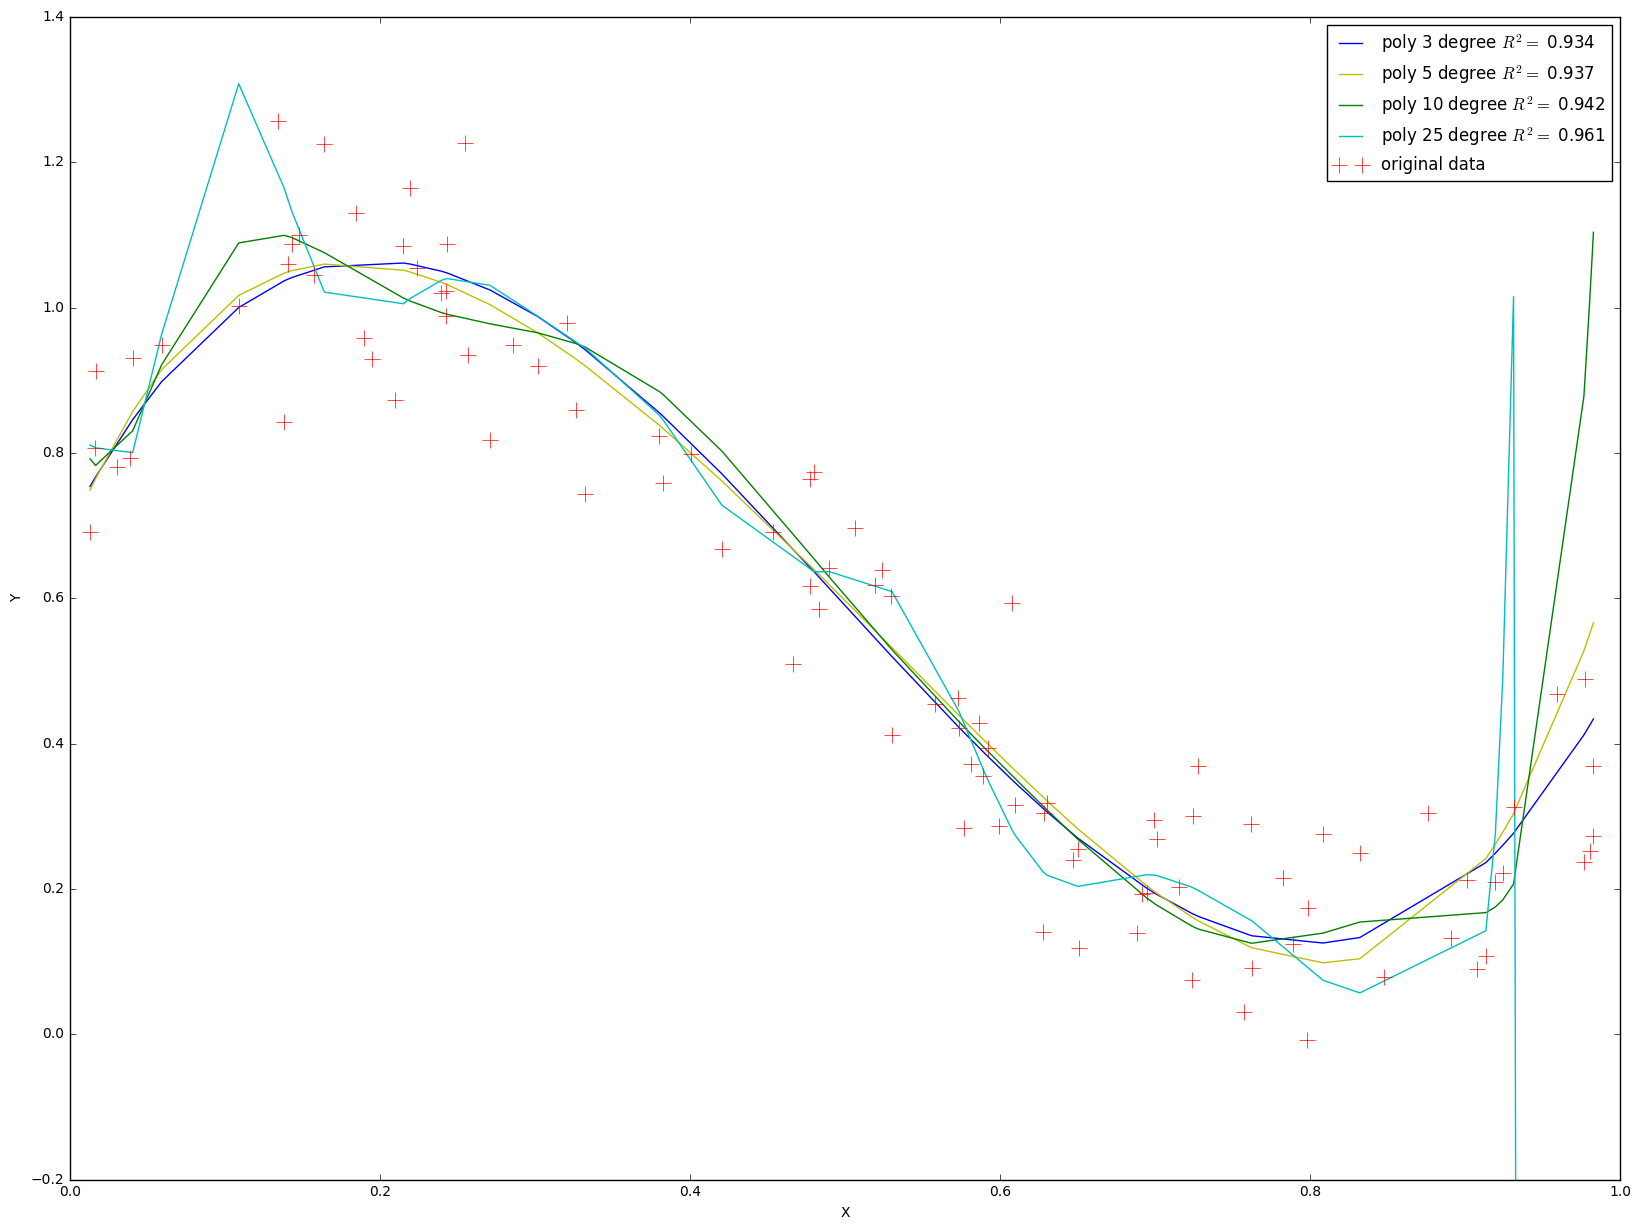

In [169]:
from sklearn.cross_validation import train_test_split as sk_split
import statsmodels.api as sm
data = np.loadtxt("datasets/dataset_3.txt", delimiter=',', skiprows = 1)
x = data[:, 0]
y = data[:, 1]

# Record size of the data set
n = x.shape[0]
d = x.shape[0]

X_train = x[50:]
X_test = x[:-50]
Y_train = y[50:]
Y_test = y[:-50]
print x.shape, y.shape

model_results, x_poly = polynomial_regression_fit(X_test,Y_test, 4)
degrees=4
y_hat_degrees = np.zeros([ degrees+1,50])
degree = [3,5,10,25] 
colors = ['b','y','g','c']
index = 0
plt.figure(figsize=(20,15))
for d in degree:
    model_results, _ = polynomial_regression_fit(X_train,Y_train, d)
    y_hat_degrees=polynomial_regression_predict(model_results.params, d, X_test)
    x_and_y = np.stack((X_test,y_hat_degrees.ravel()),axis=1)
    x_and_y = x_and_y[x_and_y[:, 0].argsort()]
    x_and_y = np.split((x_and_y),1)
    df =  pd.DataFrame(x_and_y[0])
    df.columns = ['a', 'b']
    index = index + 1
    plt.plot( df.a,df.b, colors[index-1], label='poly '+str(d) + ' degree' + r' $R^2=$ ' +
                 str(np.around(model_results.rsquared,3) ))
plt.xlim(0,1)
plt.ylim(-0.2,1.4)
plt.plot(x,y, 'r+', markersize=12, label='original data')
plt.xlabel('X'); plt.ylabel('Y')
plt.legend(loc='best')


Polynomial Regression fits the data well from 3 degrees of freedom to 8. 1 degree of freedom is a linear line. After 10 degrees of freedom the predictions are very sharp as the polynomial is attempting to overfit the data. This fit results in a greater R^2 score but does not portray the data well.

###  Part (b): Comparing training and test errors

- Split the data set in Problem 2 each into training and test sets: use the first 50% of the data for training and the remaining for testing. 


- Fit polynomial models of varying degree ranging from 1 to 15 to the training sets. Evaluate  the various fits on **both** the training and the test sets. Plot both the R^2 score of the fitted polynomial models on the training and test sets as a functions of the degree. 


- Describe the relationship between degree of the polynomial model and the fit on both the training and testing data. Explain, based on the plot, what is the best polynomial model for the data.

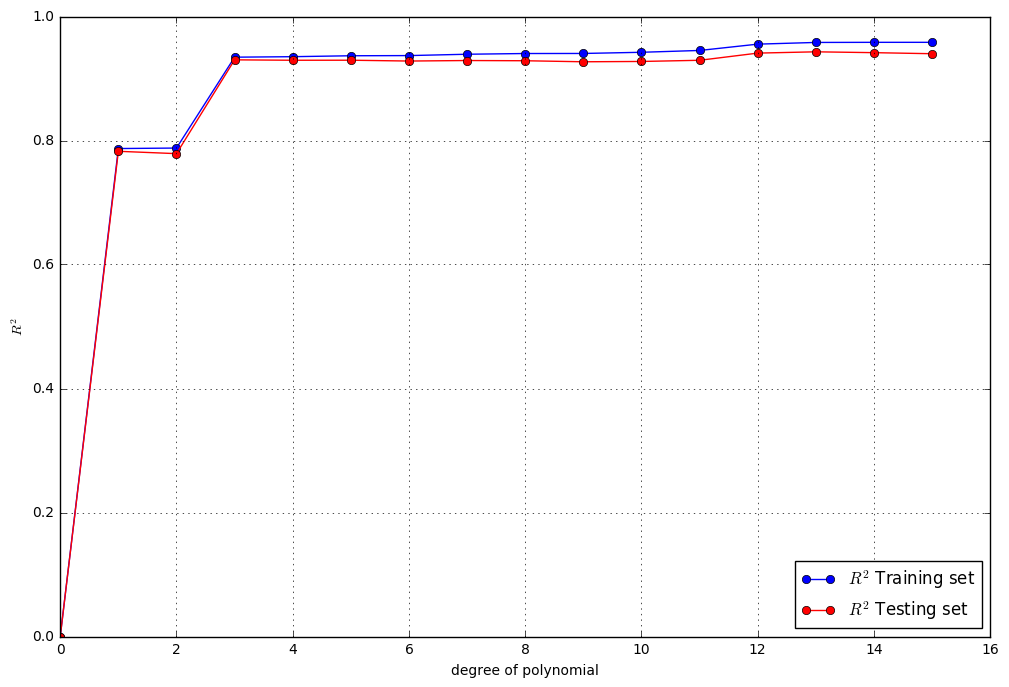

In [170]:
X_train = x[50:]
X_test = x[:-50]
Y_train = y[50:]
Y_test = y[:-50]

degrees=15
R2 = np.zeros([ degrees+1,1])
R2_test = np.zeros([ degrees+1,1])


for d in range(1, degrees +1):
    model_results, _ = polynomial_regression_fit(X_train,Y_train, d)    
    y_hat=polynomial_regression_predict(model_results.params, d, X_test)
    R2[d] = model_results.rsquared
    R2_test[d] = model_results.rsquared_adj
    #print d,R2[d],R2_test[d]
    
plt.figure(figsize=(12,8))
plt.plot(R2, 'bo-', label=r'$R^2$ Training set')
plt.plot(R2_test, 'ro-', label=r'$R^2$ Testing set')
plt.xlabel('degree of polynomial'); plt.ylabel(r'$R^2$')
plt.xlabel('degree of polynomial'); plt.ylabel(r'$R^2$')
plt.legend(loc='best')
plt.grid()

The larger amount of degrees of freedom tend to overfit the data. The data naturally is shaped as a function of x^3 and the best fits were between 3 - 5. 

The polynomials R^2 on the training set was continously increasing as the overfitting was getting closer to R^2 = 1. 


## Problem 3: Model selection criterion
In this problem, we examine various criteria that help us decide how to choose between multiple models for the same data.

###  Part (a): How does one choose the best polynomial degree?
In Problem 2, you fitted polynomials of different degrees to the entire data set, and inspected the quality of fits on the test set. In practice, one needs to find the 'best' model for the given prediction task using **only** the training set. For this, we'll now make use of two model selection criteria, namely, the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These are evaluated on the training set, but serve as a proxy for the test set accuracy.

For ``dataset_3.txt``, do the following:

- For each polynomial model you fitted, compute the AIC and BIC for the model on the training set. Plot the criterion values as a function of the polynomial degree.


- Which model is chosen by each criterion? Do they match with the model that yields maximum test R^2 score?

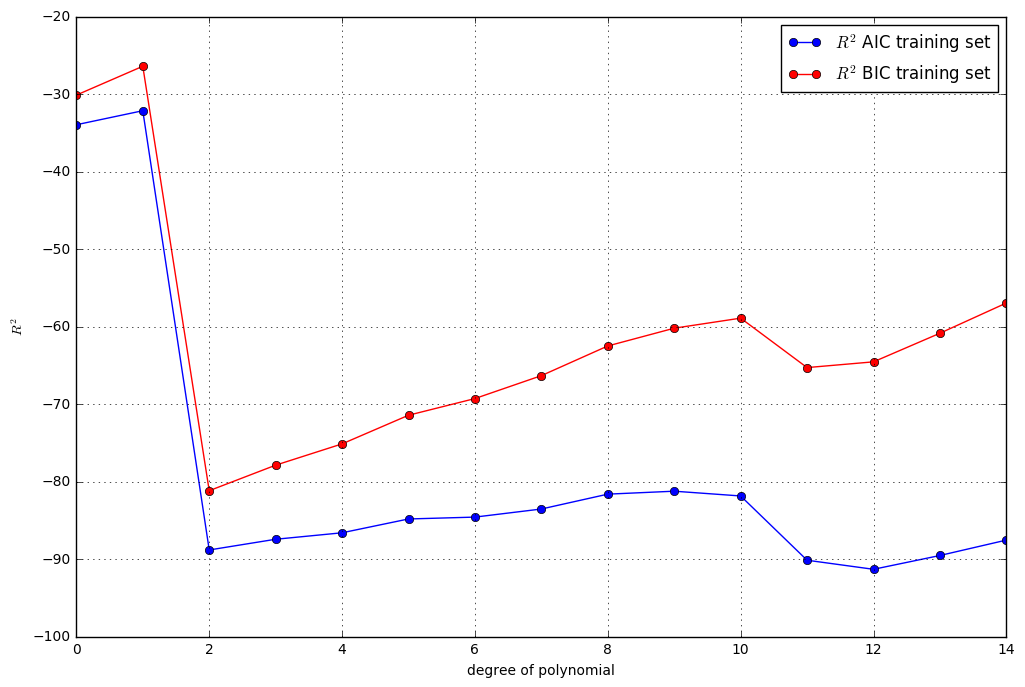

In [171]:

degrees = 15
AIC = np.zeros([ degrees+1,1])
BIC = np.zeros([ degrees+1,1])


for d in range(1, degrees +1):
    model_results, _ = polynomial_regression_fit(X_train,Y_train, d)    
    y_hat=polynomial_regression_predict(model_results.params, d, X_test)
    AIC[d] = model_results.aic
    BIC[d] = model_results.bic
    #print d, AIC[d], BIC[d]
    
    

plt.figure(figsize=(12,8))
plt.plot(AIC[1:16], 'bo-', label=r'$R^2$ AIC training set')
plt.plot(BIC[1:16], 'ro-', label=r'$R^2$ BIC training set')
#plt.plot(R2adj, 'bo-', label=r'$R^2$ Training set')

plt.xlabel('degree of polynomial'); plt.ylabel(r'$R^2$')
plt.xlabel('degree of polynomial'); plt.ylabel(r'$R^2$')
plt.legend(loc='best')
plt.grid()

The model with the best AIC was the polynomial with 12 degrees, and BICs best was 2 degrees. The best polynomial degree with overall R^2 and AIC BIC was 3 degrees polynomial. This model visually looked to naturally fit to the datas shape.

### Part (b): Application to New York taxi cab density estimation

We shall now apply the concepts learned so far to a real-world prediction task. You are asked to build a regression model for estimating the density of Green cab taxis at any given time of a day in New York city. The model needs to take the time of the day (in minutes) as input, and predict the expected number of pick ups at that time.

The data set for this problem can be downloaded from the following URL: https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv. The file contains the details of all pickups by Green cabs in New York City during January 2015. 

In [179]:
headofdf = ['VendorID','lpep_pickup_datetime','Lpep_dropoff_datetime','Store_and_fwd_flag','RateCodeID','Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude','Passenger_count','Trip_distance','Fare_amount','Extra','MTA_tax','Tip_amount','Tolls_amount','Ehail_fee','improvement_surcharge','Total_amount','Payment_type','Trip_type','a','b']
from urllib import urlopen
#apage = urlopen("https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv")
#data = pd.read_csv(apage)
data = pd.read_csv("green_tripdata_2015-01.csv", header=None,skiprows=1,index_col=False)
data.columns = headofdf #set column names correctly
data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,a,b
0,2,2015-01-01 00:34:42,2015-01-01 00:38:34,N,1,-73.922592,40.754528,-73.913635,40.765522,1,...,0.5,0.0,0.0,NaN,0.3,6.3,2,1.0,NaN,NaN
1,2,2015-01-01 00:34:46,2015-01-01 00:47:23,N,1,-73.952751,40.677711,-73.981529,40.658978,1,...,0.5,0.0,0.0,NaN,0.3,13.3,2,1.0,NaN,NaN
2,1,2015-01-01 00:34:44,2015-01-01 00:38:15,N,1,-73.843010,40.719055,-73.846581,40.711567,1,...,0.5,1.8,0.0,NaN,0.0,7.8,1,1.0,NaN,NaN
3,2,2015-01-01 00:34:48,2015-01-01 00:38:08,N,1,-73.860825,40.757793,-73.854042,40.749821,1,...,0.5,0.0,0.0,NaN,0.3,6.3,2,1.0,NaN,NaN
4,2,2015-01-01 00:34:53,2015-01-01 01:09:10,N,1,-73.945183,40.783321,-73.989624,40.765450,1,...,0.5,0.0,0.0,NaN,0.3,25.8,2,1.0,NaN,NaN


In [182]:
data.tail()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,a,b
1508496,1,2015-01-31 23:00:33,2015-01-31 23:10:15,N,1,-73.997559,40.691139,-73.940086,40.723503,1,...,0.5,1.00,0.0,NaN,0.3,17.30,1,1.0,NaN,NaN
1508497,1,2015-01-31 23:00:09,2015-01-31 23:09:56,N,1,-73.890846,40.746918,-73.862122,40.739246,2,...,0.5,0.00,0.0,NaN,0.3,10.30,2,1.0,NaN,NaN
1508498,1,2015-01-31 23:00:01,2015-01-31 23:29:48,N,1,-73.956848,40.722839,-74.004005,40.721066,1,...,0.5,0.00,0.0,NaN,0.3,26.30,2,1.0,NaN,NaN
1508499,1,2015-01-31 23:04:52,2015-01-31 23:29:32,N,1,-73.981323,40.675045,-73.992836,40.724155,4,...,0.5,4.15,0.0,NaN,0.3,24.95,1,1.0,NaN,NaN
1508500,1,2015-01-31 23:00:30,2015-01-31 23:04:57,N,1,-73.985794,40.685673,-73.994278,40.680901,2,...,0.5,2.00,0.0,NaN,0.3,8.30,1,1.0,NaN,NaN


In [183]:
print "Number of rows: %i" % data.shape[0]

Number of rows: 1508501


In [184]:
#converts all pickup times to minutes of day (out of 1440 minutes) by number of occurances
data['pickup'] = pd.DatetimeIndex(pd.to_datetime(data['lpep_pickup_datetime'], format = '%Y-%m-%d %H:%M:%S'))

data['pickupminute'] = pd.DatetimeIndex(data['pickup']).hour*60 + pd.DatetimeIndex(data['pickup']).minute

pickupcount = data.groupby(['pickupminute'])['lpep_pickup_datetime'].count()



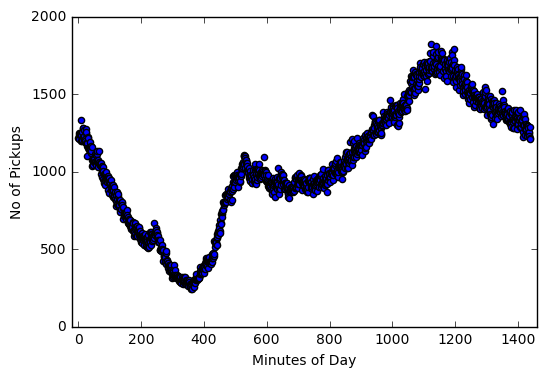

In [185]:
#Graph of all pickups by minutes of day over January
plt.scatter(pickupcount.index,pickupcount)
plt.xlabel('Minutes of Day')
plt.ylabel('No of Pickups')
plt.xlim(-20,1460)
plt.show()

In [186]:
#Stacks columns for data before creating split of test and train
data_model = np.vstack((pickupcount.index,pickupcount))
print data_model

[[   0    1    2 ..., 1437 1438 1439]
 [1213 1236 1207 ..., 1219 1211 1286]]


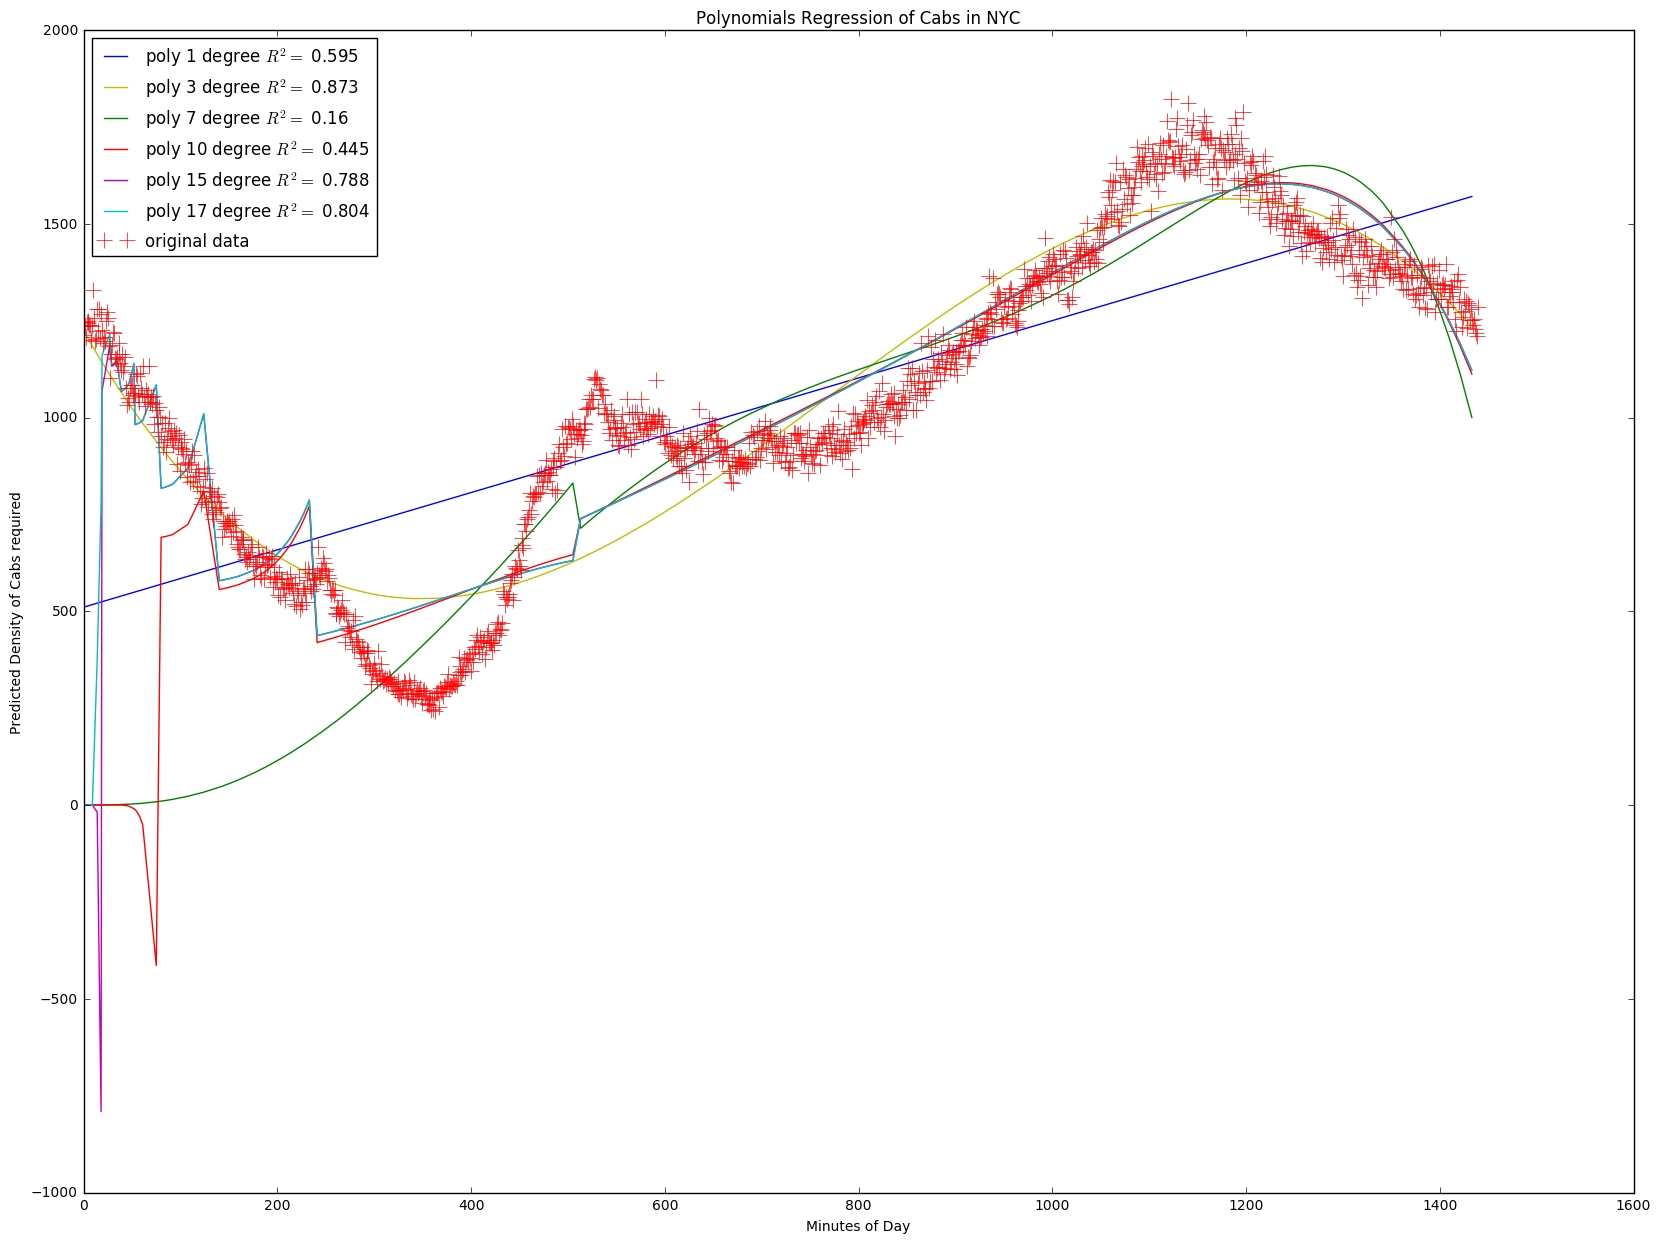

In [187]:
#plt.scatter(pickupcount.index,pickupcount)
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm


X_train, X_test, y_train, y_test = train_test_split(data_model[0], data_model[1], test_size=0.2, random_state=0)
degrees = [1,3,7,10,15,17]
index=0
colors = ['b','y','g','r','m','c']
plt.figure(figsize=(20,15))
for d in degrees:
    model_results, _ = polynomial_regression_fit(X_train,y_train, d)
    y_hat_degrees=polynomial_regression_predict(model_results.params, d,X_test)
    x_and_y = np.stack((X_test,y_hat_degrees.ravel()),axis=1)
    x_and_y = x_and_y[x_and_y[:, 0].argsort()]
    x_and_y = np.split((x_and_y),1)
    df =  pd.DataFrame(x_and_y[0])
    df.columns = ['a', 'b']
    index = index + 1
    plt.plot( df.a,df.b, colors[index-1], label='poly '+str(d) + ' degree' + r' $R^2=$ ' +
                 str(np.around(model_results.rsquared,3) ))
plt.plot(data_model[0],data_model[1], 'r+', markersize=12, label='original data')
plt.xlabel('Minutes of Day'); plt.ylabel('Predicted Density of Cabs required')
plt.title("Polynomials Regression of Cabs in NYC")
plt.legend(loc='best')

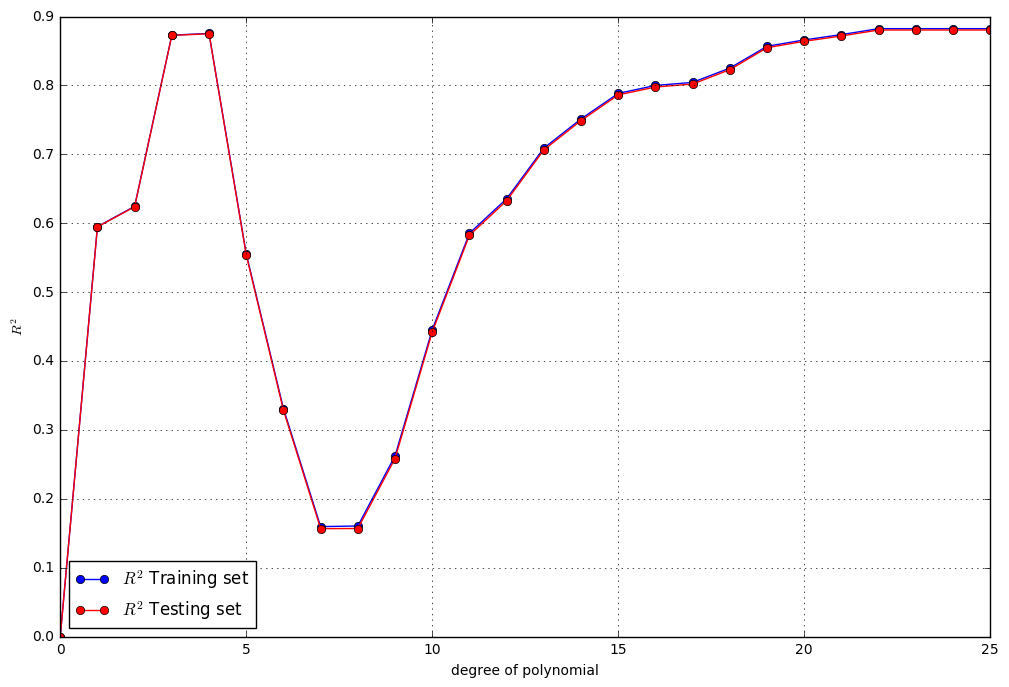

In [157]:
degrees=25
R2 = np.zeros([ degrees+1,1])
R2_test = np.zeros([ degrees+1,1])


for d in range(1, degrees +1):
    model_results, _ = polynomial_regression_fit(X_train,y_train, d)    
    y_hat=polynomial_regression_predict(model_results.params, d, X_test)
    R2[d] = model_results.rsquared
    R2_test[d] = model_results.rsquared_adj
    #print d,R2[d],R2_test[d]
    
plt.figure(figsize=(12,8))
plt.plot(R2, 'bo-', label=r'$R^2$ Training set')
plt.plot(R2_test, 'ro-', label=r'$R^2$ Testing set')
plt.xlabel('degree of polynomial'); plt.ylabel(r'$R^2$')
plt.xlabel('degree of polynomial'); plt.ylabel(r'$R^2$')
plt.legend(loc='best')
plt.grid()

The best $R^2$ score in this chart was degree 3 and 4. The chart rapidly drops and then by overfitting gradually rises back up to 0.9 $R^2$

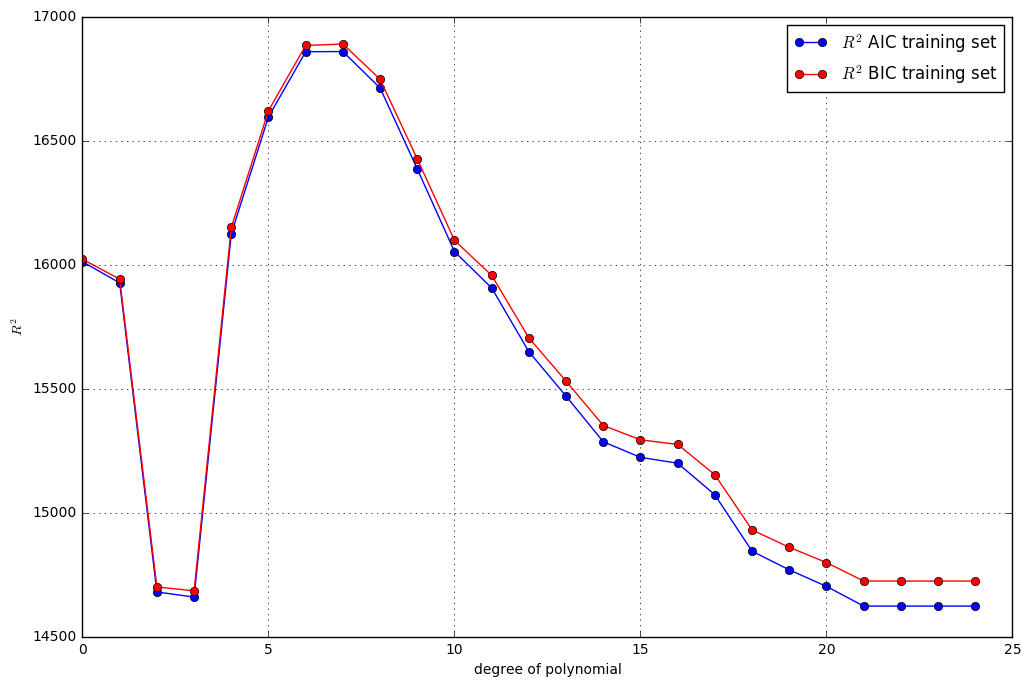

In [164]:
degrees = 25
AIC = np.zeros([ degrees+1,1])
BIC = np.zeros([ degrees+1,1])


for d in range(1, degrees +1):
    model_results, _ = polynomial_regression_fit(X_train,y_train, d)    
    y_hat=polynomial_regression_predict(model_results.params, d, X_test)
    AIC[d] = model_results.aic
    BIC[d] = model_results.bic
    #print d, AIC[d], BIC[d]
    
    

plt.figure(figsize=(12,8))
plt.plot(AIC[1:26], 'bo-', label=r'$R^2$ AIC training set')
plt.plot(BIC[1:26], 'ro-', label=r'$R^2$ BIC training set')
#plt.plot(R2adj, 'bo-', label=r'$R^2$ Training set')

plt.xlabel('degree of polynomial'); plt.ylabel(r'$R^2$')
plt.xlabel('degree of polynomial'); plt.ylabel(r'$R^2$')
plt.legend(loc='best')
plt.grid()

The best $AIC$ and $BIC$ was again the polynomial with 3 and 4 degrees, 4 degree polynomial edging out 3 with a score of 14658.90870241 for the AIC training set, and 14684.15497661 BIC training set.

Clearly the best choice of polynomial regression for estimating the density of Green cabs required at any point in time during the day is with polynomial 3 or 4 degrees of freedom

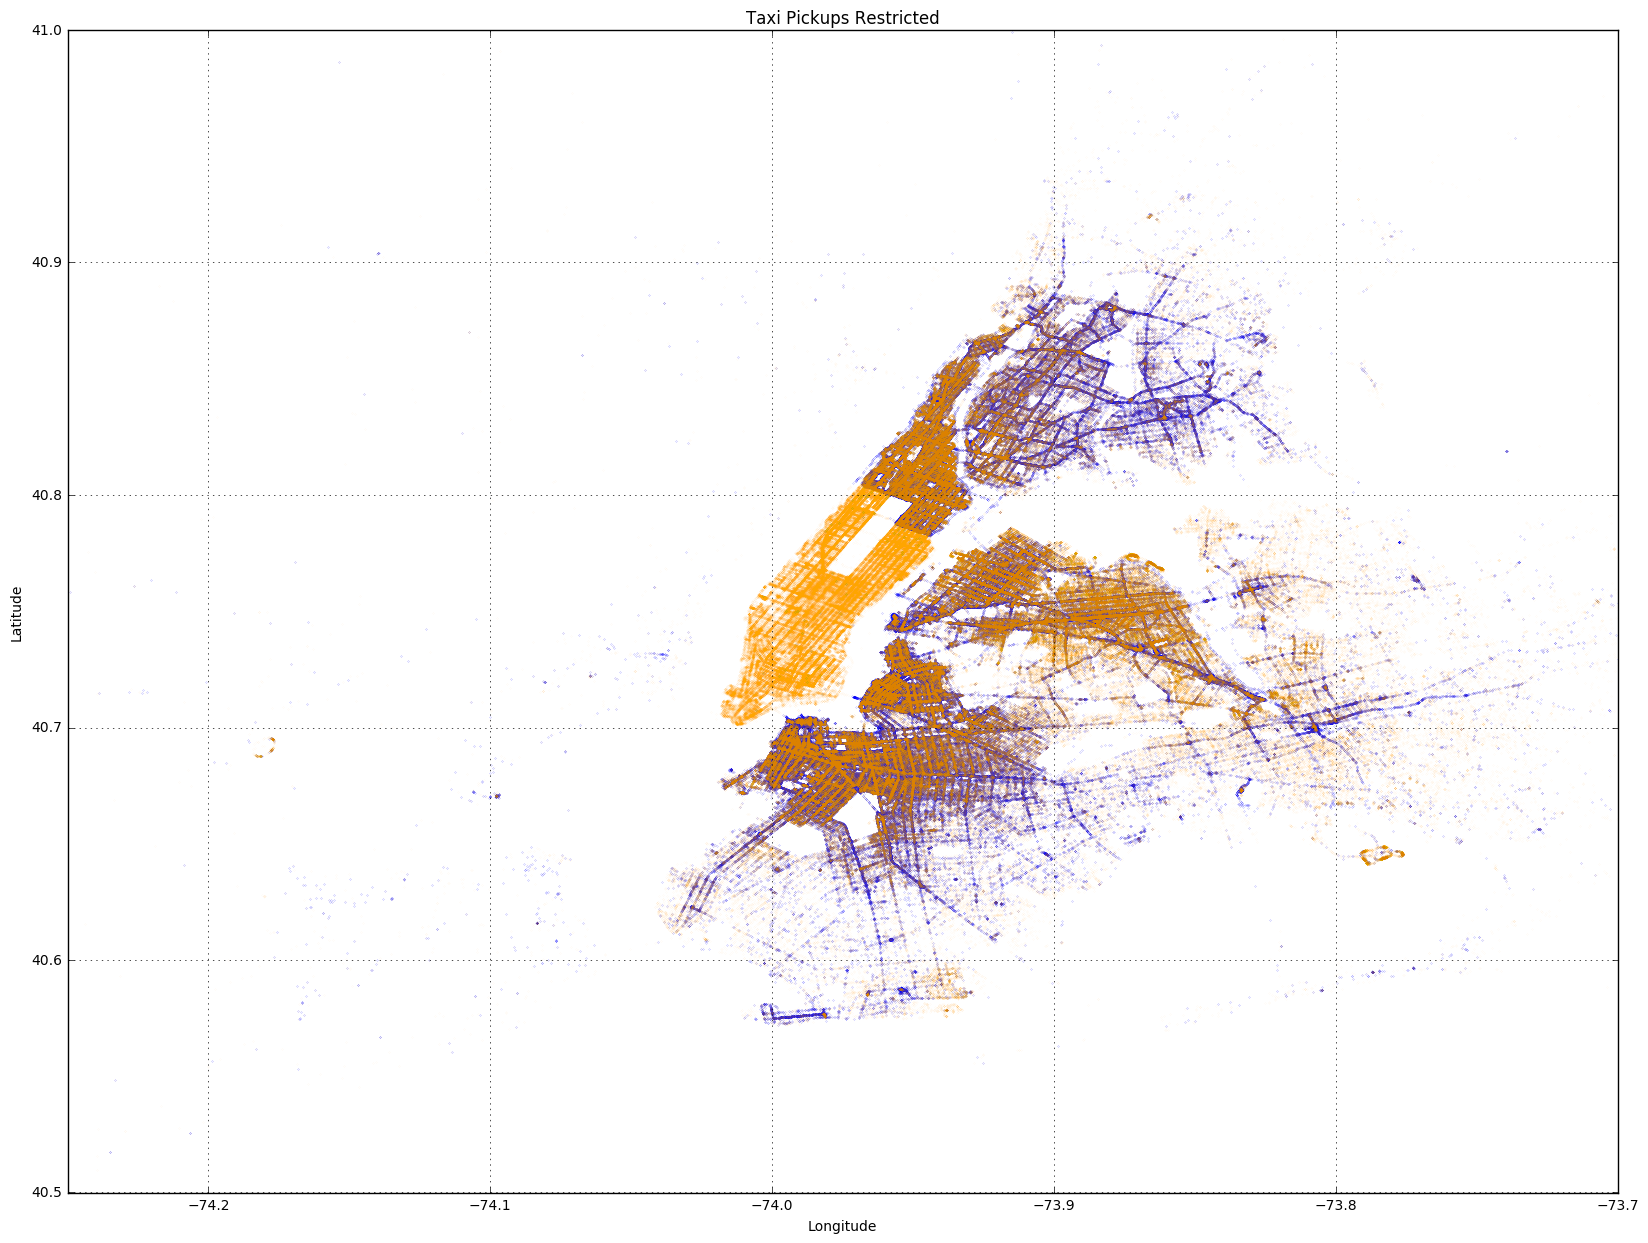

In [181]:
plt.figure(figsize=(20,15))
plt.scatter(data['Pickup_longitude'], data['Pickup_latitude'], color='blue', s=0.01)
plt.scatter(data['Dropoff_longitude'], data['Dropoff_latitude'], color='orange', s=0.0003)
plt.title('Taxi Pickups Restricted')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-74.25,-73.7)
plt.ylim(40.5, 41)
plt.grid()
plt.show()
#Data has pickups far outside of New York City, plotted below is just points between xlim and ylim, showing a majority of New York City

## Challenge Problem: Advanced regression techniques
In this problem, we revisit the automobile pricing data set in Problem 1(a) and explore advanced regression techniques to build better models. 


### Part (a): Polynomial regression on multi-dimensions
In Problems 2-3, you had implemented a polynomial regression technique for data sets with a single predictor variable. How would you use a similar approach to fit a polynomial model on data sets with more than one predictor?

Reload ``dataset_1_train.txt`` and ``dataset_1_test.txt``. Fit polynomial models of degrees 2 and 3 to the training set, and evaluate the R^2 score of the fitted model on the test set. How do they compare with the test performance of a linear regression model?

In [180]:
#incomplete
data_train = np.loadtxt('datasets/dataset_1_train.txt', delimiter=',', skiprows=1)
data_test = np.loadtxt('datasets/dataset_1_test.txt', delimiter=',', skiprows=1)

#Stacks columns for data before creating split of test and train
data_model = np.vstack((data_train,data_test))

X_train, X_test, y_train, y_test = train_test_split(data_model[:,0:1], data_model[:,2], test_size=0.5, random_state=0)
degrees = [1,3,7,10,15,17]
index=0
colors = ['b','y','g','r','m','w']
plt.figure(figsize=(20,15))
for d in degrees:
    model_results, _ = multiple_polynomial_regression_fit(X_train,y_train, d)
    y_hat_degrees=multiple_polynomial_regression_predict(model_results, d,X_test)
    index = index + 1
    plt.plot(X_test,y_hat_degrees.ravel(),colors[index-1]+'s',label = 'r')
    print y_hat_degrees
plt.plot(data_model[:,0],data_model[:,2], 'r+', markersize=12, label='original data')
plt.xlabel('X'); plt.ylabel('Y Predicted')
plt.legend(loc='best')

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [176]:
def multiple_linear_regression_fit(x_train, y_train):
    
    # Append a column of one's to x
    n = x_train.shape[0]
    ones_col = np.ones((n, 1))
    x_train = np.concatenate((x_train, ones_col), axis=1)
    
    # Compute transpose of x
    x_transpose = np.transpose(x_train)
    
    # Compute coefficients: w = inv(x^T * x) x^T * y
    # Compute intermediate term: inv(x^T * x)
    # Note: We have to take pseudo-inverse (pinv), just in case x^T * x is not invertible 
    x_t_x_inv = np.linalg.pinv(np.dot(x_transpose, x_train))
    
    # Compute w: inter_term * x^T * y 
    w = np.dot(np.dot(x_t_x_inv, x_transpose), y_train)
    
    # Obtain intercept: 'c' (last index)
    c = w[-1]
    
    return w[:-1], c


def multiple_polynomial_regression_fit(x, y, degrees):
    # Create the poly terms for x,x^2 .. 
    n = x.shape[0]
    x_poly = np.zeros((n, degree-1)) # poly degree 
    
    for d in range(1, degrees +1):
        x_polyd = np.power(x, d)  # adding terms 
        
    x_poly = np.concatenate((x_poly, x_polyd), axis=1)
    ones_col = np.ones((n, 1))
    x = np.concatenate((x, ones_col), axis=1)
    Xt=np.transpose(x)
    #Xt = np.add(Xt,x_poly)
    x_t_x_inv = np.linalg.pinv(np.dot(Xt, x))
    w = np.dot(np.dot(x_t_x_inv, Xt), y)
    c = w[-1]
    return w, c
    #model=sm.OLS(y,Xt)
    #model_results=model.fit()
    #return model_results, Xt


def multiple_polynomial_regression_predict(params, degrees, x):
    # # Create the poly terms for x,x^2 ..
    n = x.shape[0]
    x_poly = np.zeros([n, degrees-1])
    
    for d in range(1, degrees + 1):
        x_polyd = np.power(x, d) 
    x_poly = np.concatenate((x_poly, x_polyd), axis=1)
    ones_col = np.ones((n, 1))
    x = np.concatenate((x, ones_col), axis=1)
    Xt=np.transpose(x)
    #Xt = np.add(Xt,x_poly)
    x_t_x_inv = np.linalg.pinv(np.dot(Xt, x))
    #print x_t_x_inv.shape, x.shape, Xt.shape, params.shape
    # Predict y-vals
    #y_pred  = np.dot(params,np.dot(x_t_x_inv,Xt))
    y_pred  = np.dot(params,Xt)
    return np.transpose(y_pred)

### Part (b): Weighted linear regression

Suppose you are told that some of the prices recorded in the training set are noisy, and you are given the list of noisy points, how would you use this information during training to fit a better regression model?

The noise level for each training point is provided in the file dataset_1_train_noise_levels.txt. A noise level 'none' indicates that the price is accurate, and a noise level 'noisy' indicates that the price is only moderately accurate. 

We want to fit a linear regression model that accounts for this new information. One way to do this is to assign different weights to each training point based on the amount of noise associated to that training point. That is, our loss function is now
$$
\sum_{i=1}^n \alpha_i\,(y_i \,-\, w^T x_i)^2
$$
where $\alpha_i$ is a number representing how much you value the contribution of the data point $x_i$.

How does the R^2 score (evaluated on the test set) of the new linear model compare to the one fitted using plain linear regression?